In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from datetime import datetime,timedelta

In [2]:
#数据加载
data=pd.read_csv('./tianchi_fresh_comp_train_user.csv')
print(data.head())

    user_id    item_id  behavior_type user_geohash  item_category  \
0  10001082  285259775              1      97lk14c           4076   
1  10001082    4368907              1          NaN           5503   
2  10001082    4368907              1          NaN           5503   
3  10001082   53616768              1          NaN           9762   
4  10001082  151466952              1          NaN           5232   

            time  
0  2014-12-08 18  
1  2014-12-12 12  
2  2014-12-12 12  
3  2014-12-02 15  
4  2014-12-12 11  


In [4]:
#CVR
count_all=0
count_4=0
count_user=data['behavior_type'].value_counts()
count_all=count_user[1]+count_user[2]+count_user[3]+count_user[4]
count_4+=count_user[4]
cvr=count_4/count_all
print('CVR={}%'.format(cvr*100))

CVR=0.9985776926023916%


In [6]:
def show_count_day(df,date_str):
    df['time']=pd.to_datetime(df['time'])
    df.index=df['time']
    #print(df.head())
    count_day=defaultdict(int)
    #str1='2014-11-17'
    temp_date=datetime.strptime(date_str,'%Y-%m-%d')
    delta=timedelta(days=1)
    #print(temp_date)
    for i in range(31):
        temp_date=temp_date+delta
        temp_str=temp_date.strftime('%Y-%m-%d')#将时间转化为字符串类型
        count_day[temp_str]+=df.loc[temp_str].shape[0]
    df_count_day=pd.DataFrame.from_dict(count_day,orient='index',columns=['count'])
    df_count_day['count'].plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)

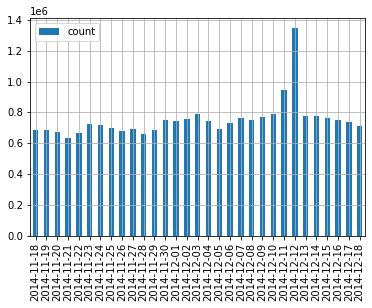

In [7]:
show_count_day(data,'2014-11-17')

In [10]:
#数据加载
df_item=pd.read_csv('./tianchi_fresh_comp_train_item.csv')
#data=pd.merge(data.reset_index(),df_item,on=['item_id']).set_index('time')
#print(data.shape)
#print(data.head())

In [24]:
def show_count_hour(date1,df):
    count_hour={}
    for i in range(24):
        time_str=date1+' %02.d'%i
        count_hour[time_str]=[0,0,0,0]
        temp=df.loc[time_str]['behavior_type'].value_counts()
        for j in range(len(temp)):
            count_hour[time_str][temp.index[j]-1]+=temp[temp.index[j]]
    print(count_hour)
    df_count_hour=pd.DataFrame.from_dict(count_hour,orient='index')
    df_count_hour.plot(kind='bar')
    plt.legend(loc='best')
    plt.grid(True)

{'2014-12-12 00': [87638, 1180, 4705, 4407], '2014-12-12 01': [38217, 509, 1487, 865], '2014-12-12 02': [21510, 365, 751, 491], '2014-12-12 03': [13100, 194, 442, 243], '2014-12-12 04': [9901, 140, 440, 222], '2014-12-12 05': [11494, 119, 485, 259], '2014-12-12 06': [23482, 295, 797, 545], '2014-12-12 07': [37956, 492, 1319, 881], '2014-12-12 08': [50923, 804, 1910, 1363], '2014-12-12 09': [53342, 697, 2223, 1659], '2014-12-12 10': [60806, 917, 2441, 1666], '2014-12-12 11': [54636, 864, 2098, 1603], '2014-12-12 12': [54835, 983, 2008, 1289], '2014-12-12 13': [60916, 1116, 2348, 1507], '2014-12-12 14': [53294, 991, 2022, 1163], '2014-12-12 15': [54780, 924, 2023, 1228], '2014-12-12 16': [53353, 933, 1815, 1098], '2014-12-12 17': [43885, 938, 1600, 835], '2014-12-12 18': [48683, 916, 1718, 987], '2014-12-12 19': [60983, 920, 2064, 1127], '2014-12-12 20': [79216, 1388, 2397, 1327], '2014-12-12 21': [97226, 1410, 3212, 1620], '2014-12-12 22': [94300, 1506, 3442, 1728], '2014-12-12 23': [82

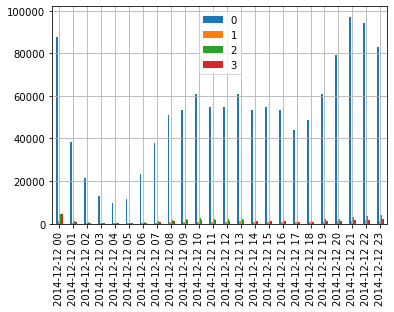

In [25]:
show_count_hour('2014-12-12',data)